# **Dino run Bot**

# Modelo: Algoritmos genéticos

Para lograr que nuestro bot aprenda a jugar vamos a usar algoritmos genéticos. La idea consiste en crear una cantidad considerables de individuos/agentes donde c/u de estos tendrá un genoma (conjunto de genes) propio. 

Como consecuencia, cada uno se comportará de forma distinta y algunos sobrevivirán más que otros, por lo que la idea consiste en quedarnos con los individuos que más sobrevivieron, combinar sus genes y a partir de estos crear una nueva generación de individuos.

De esta forma, a medida que pasan las generaciones el comportamiento de estos individuos debería ir mejorando ya que empiezan con genes aleatorios y con el paso del tiempo los genes se van creando a partir de los genes de los mejores individuos de generaciones pasadas.

## Genoma
El genoma es el conjunto de genes y va a determinar el comportamiento del individuo. Esta representado con una red neuronal donde cada una de las conexiones neuronales representa un gen.

Por otro lado, lo que representa y hace único a un genoma no es más que el conjunto de los pesos y biases de cada una de las neuronas que conforman dicha red.

## Flujo
### Primera generación 
* Se crean una cantidad considerables de individuos de una misma generacion
* Cada individuo tendrá su propio genoma
* Para cada genoma, sus pesos y sus biases se inicializan al azar

### Supervivencia
* Por estadística es esperable que algunos individuos tengan un mejor desempeño que otros.
* Una vez extinguidos todos los individuos, nos guardamos los genomas de los mejores n individuos

### Próxima generación    
Ahora los individuos no se crearán con un genoma random, el mismo se creará a partir de los mejores genomas anteriores aplicando:

* Cruce: Consiste en combinar los genomas anteriores, por ejemplo haciendo un promedio ponderado según que tan bueno haya sido el desempeño del individuo con dicho genoma, combinar partes de los distintos genomas, u otro método.
* Mutación: Para que los genomas sean distintos, se aplica mutación que consiste en aplicar pequeñas modificaciones a los genomas para generar ciertas variaciones.

## Implementación

In [1]:
# - arquitectura: lista donde el elemento i representa la cantidad de neuronas que tiene la capa i
# - genomas: lista de genomas los cuales se combinarán para formar el nuevo genoma.
#   si la lista esta vacía, entonces se inicializará con valores random
class Genome():
    def __init__(self, architecture, genomes=[]):
        all_comb = np.prod(np.array(architecture))//architecture[-1]
        self.architecture = architecture
        self.activation = Genome.relu
        if len(genomes) == 0:
            self.weights, self.biases = Genome.random_params(architecture)
        else:
            self.weights, self.biases = Genome.mix_genomes(genomes)

    # Funciones de activacion
    def relu(x):
        return np.maximum(0, x)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()

    # Asignacion de pesos
    def mix_genomes(genomes):
        weights = {}
        biases = {}

        # Asigno importancia a cada gen para un promedio ponderado
        avg_w = []
        for i in range(len(genomes)):
            prev = len(genomes) if i == 0 else avg_w[i-1]
            avg_w.append(prev/2+0.5)

        # Recorro capas (pesos) -> w1,w2,...,wn
        for i in range(1, len(genomes[0].architecture)):
            # Promedio entre los mismos pesos de cada red neuronal (genoma)
            # w1G1=[[a,b],[c,d]] ; w1G2=[[e,f],[g,h]] ; w1G3=[[i,j],[k,l]]
            # =>  w1G4 = [ [mean(a,e,i) , mean(b,f,j)] , [mean(c,g,j) , mean(d,h,l)] ]
            current_weights = [genome.get_weight(i) for genome in genomes]
            avg_weight = np.average(current_weights, axis=0, weights=avg_w)
            weights["w"+str(i)] = Genome.apply_mutation(avg_weight)

            current_biases = [genome.get_bias(i) for genome in genomes]
            avg_bias = np.average(current_biases, axis=0, weights=avg_w)
            biases["b"+str(i)] = Genome.apply_mutation(avg_bias)

        return weights, biases

    def apply_mutation(x):
        x_size = np.size(x)
        # Mutamos el entre el 0 y 30% de los valores
        max_mutations = x_size*0.3
        n_mutations = np.random.randint(low=0, high= max_mutations if max_mutations>=1 else 1 )
        # Seleccionamos aleatoriamente el indice de los valores a mutar
        for idx in np.random.randint(low=0, high=x_size-1, size=n_mutations):
            value = np.random.rand()*10-5
            x.flat[idx] = value
        return x

    def random_params(architecture):
        weights = {}
        biases = {}
        for i in range(1, len(architecture)):
            weights["w"+str(i)] = (np.random.rand(architecture[i],
                                                  architecture[i-1]))*10-5
            biases["b"+str(i)] = (np.random.rand(architecture[i], 1))*10-5
        return weights, biases

    # Obtener pesos y bias
    def get_weight(self, i):
        return self.weights["w"+str(i)]

    def get_bias(self, i):
        return self.biases["b"+str(i)]

    # Obtener output
    def evaluate(self, data):
        self.results = {}
        self.results["y0"] = np.array(data).T

        for i in range(1, len(self.architecture)):
            self.results["z"+str(i)] = self.weights["w"+str(i)
                                                    ]@self.results["y"+str(i-1)]+self.biases["b"+str(i)]
            if i < len(self.architecture)-1:
                self.results["y" +
                             str(i)] = self.activation(self.results["z"+str(i)])
            else:
                self.results["y" +
                             str(i)] = self.softmax(self.results["z"+str(i)])

        output = self.results["y"+str(len(self.architecture)-1)]
        return output, np.argmax(output)


## Input
* Coordenada Y del dinosaurio (d_y)
* Distancia al proximo obstaculo (d)
* Coordenada Y del proximo obstaculo (o_y)
* Ancho del proximo obstaculo (o_w)
* Altura del proximo obstaculo (o_h)
* Velocidad (v)
* Hay obstaculo (T o F)


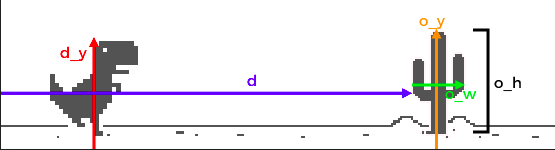

## Arquitectura de la red

* La primera capa tendrá 7 neuronas, dado a que contamos con 7 inputs.
* Luego habrá dos capas ocultas con 10 neuronas cada una. Usamos ReLu como función de activación.
* Finalmente, en la última capa utilizaremos Softmax como función de activación por lo que habrán 3 neuronas dado a que contamos con 3 acciones posibles:
    - Saltar
    - Agacharse
    - No hacer nada

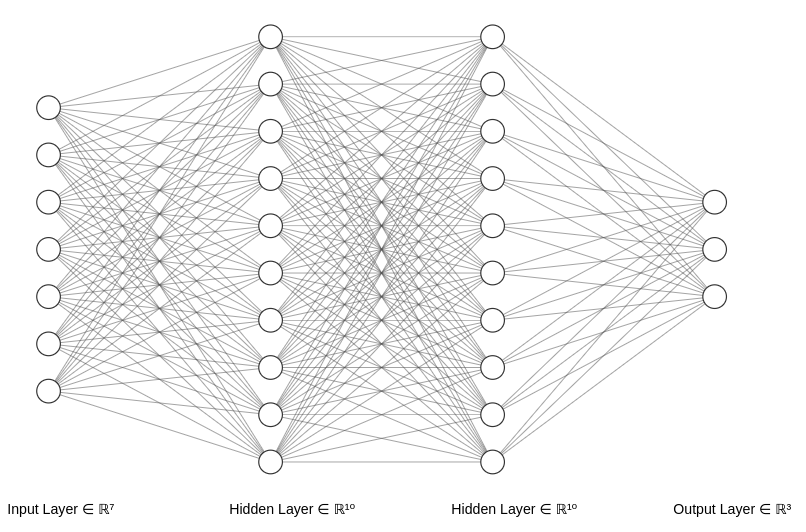

# Entrenamiento (juego réplica)
El entrenamiento se realiza por refuerzo a medida que aumentan la cantidad de generaciones, donde cada una de estas mejora respecto de las anteriores. Sin embargo, para cada generacion se requiere una cantidad importante de ejemplares (vamos a usar entre 1000 y 3000), como en el juego original solo podemos jugar con un dinosaurio a la vez, para el entrenamiento vamos a implementar una versión del juego para poder entrenar toda una generación en simultaneo.

Otra ventaja de entrenarlo de esta manera es que ya conocemos de antemano el valor de los inputs que requiere la red, mientras que cuando juguemos el juego real vamos a tener que identificar los distintos elementos de la escena y a partir de estos calcular los inputs

\>> Código en: /dino_game/main.py 

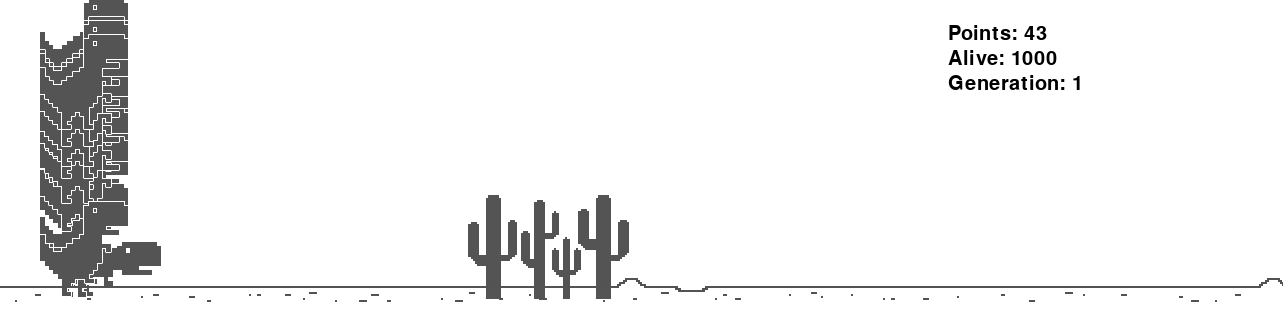

## Resultados
Luego de entrenar durante 100 generaciones de 1000 individuos c/u, se recolectaron los diez mejores puntajes de cada generación y se obtuvieron los siguientes resultados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scores = pd.read_csv("scores/scores.csv")
scores.set_index("generation",inplace=True)
scores.head()

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
generation,,,,,,,,,,
1,384,383,383,382,382,381,381,325,324,324
2,1613,1282,872,713,382,324,320,319,258,258
3,1062,440,265,264,262,258,202,201,200,199
4,1697,1696,1330,1113,1071,1070,1070,1066,876,824
5,675,672,671,671,617,446,446,394,389,388


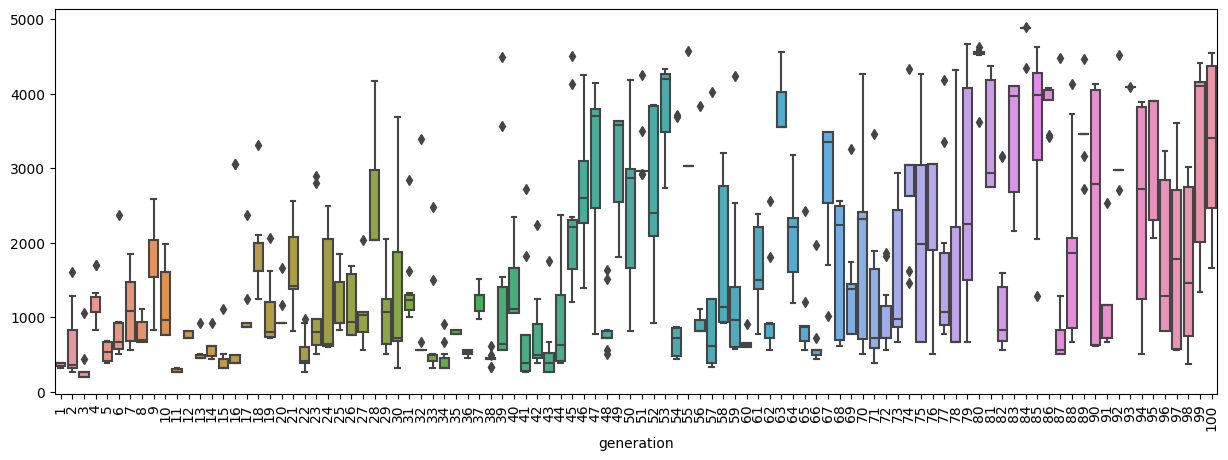

In [3]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(scores.T)
plt.xticks(rotation=90)
plt.show()

Vemos que el gráfico es algo confuso, aunque podemos notar que los valores máximos tienden a aumentar a medida que transcurren las generaciones, a diferencia de los valores minimos que suelen ser bajos. Esto lo podemos ver más claramente en los siguientes gráficos

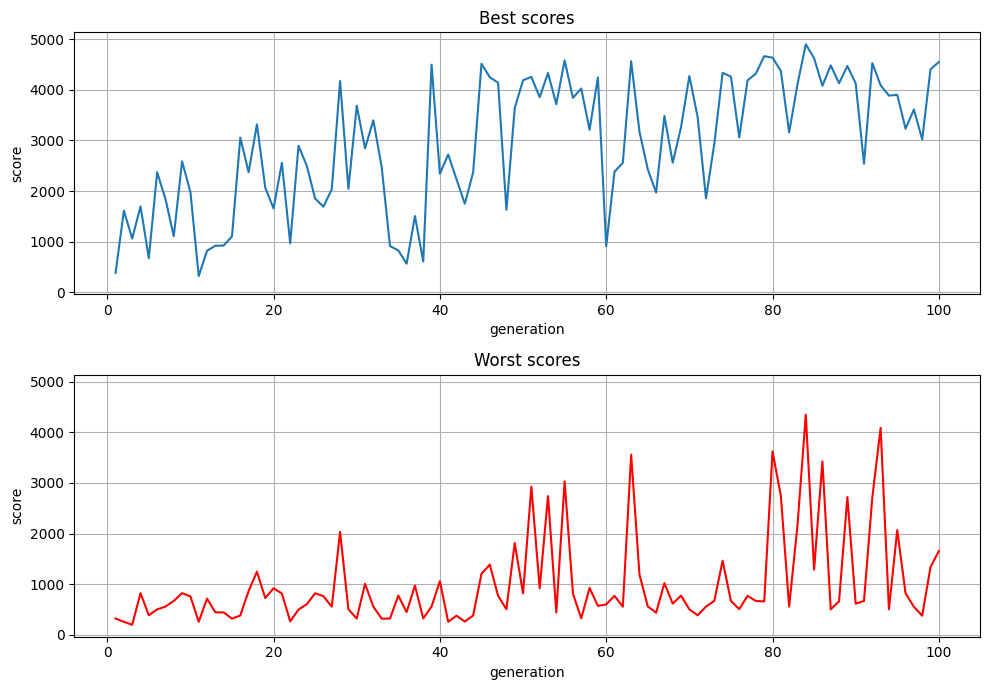

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))
ax[0].grid()
ax[1].grid()
ax[1].sharey(ax[0])
ax[0].plot(scores.index.values, scores["1st"])
ax[1].plot(scores.index.values, scores["10th"],c="r")
ax[0].set_title("Best scores")
ax[0].set_xlabel("generation")
ax[0].set_ylabel("score")

ax[1].set_title("Worst scores")
ax[1].set_xlabel("generation")
ax[1].set_ylabel("score")
fig.tight_layout()
plt.show()

Efectivamente, a medida que aumentan las generaciones podemos observar como también aumenta el puntaje maximo obtenido aunque de forma algo irregular, sin embargo la tendencia es hacia arriba. Por otro lado, en cuanto al puntaje más bajo, este si bien aumenta bastante en algunas de las generaciones, en la mayoria se mantiene bastante bajo.

Dejandolo entrenar por más tiempo vemos que el máximo tiende a 5000 puntos aproximadamente

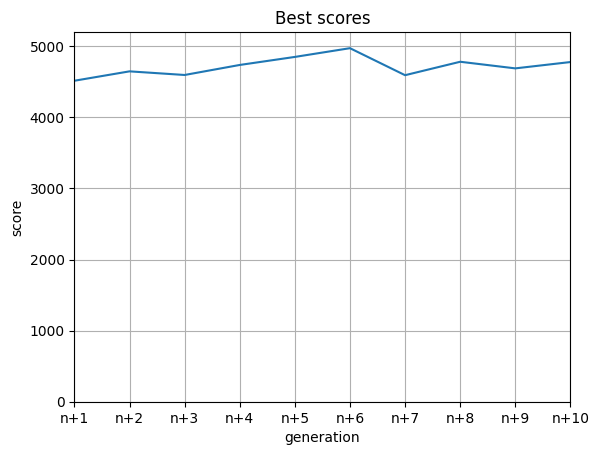

In [5]:
scores2 = pd.read_csv("scores/scores2.csv")
plt.plot(scores2.generation, scores2["1st"])
plt.title("Best scores")
plt.xlabel("generation")
plt.ylabel("score")
plt.ylim([0, 5200])
plt.xlim([1, 10])
plt.xticks(scores2.generation, ["n+1","n+2","n+3","n+4","n+5","n+6","n+7","n+8","n+9","n+10"])
plt.grid()
plt.show()

# Juego real

## Deteccion de elementos

Primero seteamos el area de la pantalla que queremos capturar. Para saber el pixel correspondiente a cada posicion se puede usar pyautogui.

```
import pyautogui

print(pyautogui.position())
```

Luego procedemos a hacer la captura de pantalla para posteriormente realizar la deteccion de elementos

In [10]:
import time
from mss import mss
import numpy as np
import cv2

#Rectangulo de la pantalla que nos interesa
SCREEN = {'top': 212, 'left': 60, 'width': 1290, 'height': 320}

#Screenshot
time.sleep(2)
image = mss().grab(SCREEN)
image = np.array(image)
img = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)

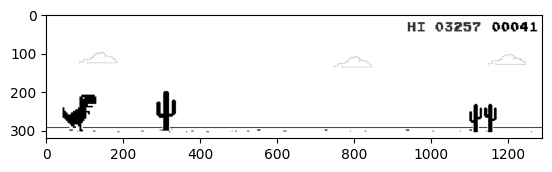

In [11]:
plt.imshow(img,cmap="gray")
plt.show()

Ahora debemos detectar la posición de los obstaculos y la del dinosaurio utilizando la imagen anterior

In [12]:
SCREEN_H = 320

def invert_y_axis(value):
    return abs(value-SCREEN_H)

def ocurrences(a_list, value, r):
    count = 0
    idxs = []
    for i,l in enumerate(a_list):
        if abs(l-value) < r:
            count+=1
            idxs.append(i)
    return count, idxs

# Recibe la imagen, lista de templates a buscar dentro de la imagen y la ruta de estas templates
# Encuentra todas las coincidencias que superen el 90%, devolviendo el puntaje y los cuatro vertices que
# delimitan el rectangulo que encierra la figura.
def detect_object(img, template_list, path):
    detected_objs = []
    max_values = []
    
    for obj in template_list:
        template = cv2.imread(f"{path}/{obj}.png",0)
        w, h = template.shape[::-1]
        method = eval('cv2.TM_CCOEFF_NORMED')
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        #Consideramos sólo los que mas matchean
        if max_val > 0.9:
        #if obj == "DinoStart" or obj == "SmallCactus2":
            top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)
            detected_objs.append([top_left, bottom_right, w, h])
            max_values.append(max_val)
            
    return detected_objs, max_values

def detect_dino(img):
    dino_types = [
        'DinoStart',
        'DinoRun1',
        'DinoRun2',
        'DinoDuck1',
        'DinoDuck2'
    ]
    
    res, max_values = detect_object(img, dino_types, "pics/elements")
    if (len(res)):
        # Nos quedamos con el dinosaurio con mayor coincidencia
        best_dino = res[max_values.index(max(max_values))]
        top_left, bottom_right, w, h = best_dino
        return {"x":top_left[0]+w,
                "y":invert_y_axis(top_left[1]),
                "h":h,
                "top_left":top_left, 
                "bottom_right":bottom_right}
    return False

def detect_obstacles(img, dino_data):
    obstacles_type = [
        'SmallCactus1',
        'SmallCactus2',
        'SmallCactus3',
        'LargeCactus1',
        'LargeCactus2',
        'LargeCactus3',
        'Bird1',
        'Bird2'
    ]
    
    res, max_values = detect_object(img, obstacles_type, "pics/elements")

    if (len(res)):
        next_obs = []
        # Nos quedamos con el obstaculo mas cercano
        distances = [obs[0][0]-dino_data["x"] for obs in res]
        min_dist = min(distances)
        
        count, idxs = ocurrences(distances, min_dist, 10)
        # En caso de que se detecten mas de un obstaculo cercano (a la misma distancia), nos quedamos con el mas ancho
        # (esto es porque puede pasar que se detecte un cactus simple dentro un cactus doble o triple)
        if count > 1:
            nearest_obs = list(filter(lambda obs: res.index(obs) in idxs, res))
            widths = [obs[2] for obs in nearest_obs]
            next_obs = nearest_obs[widths.index(max(widths))]
        else:
            next_obs = res[distances.index(min_dist)]
            
        top_left, bottom_right, w, h = next_obs
        return {"d":top_left[0]-dino_data["x"], 
                "y":invert_y_axis(top_left[1]),
                "w":w,
                "h":h,
                "top_left":top_left, 
                "bottom_right":bottom_right}
    return False

def detect_elements(img):
    #Obtener data del dinosaurio
    dino_data = detect_dino(img)
    if dino_data:
        #Obtener data del siguiente obstaculo
        obstacle_data = detect_obstacles(img, dino_data)
        if (obstacle_data):
            cv2.rectangle(img,dino_data["top_left"], dino_data["bottom_right"], 100, 2)
            cv2.rectangle(img,obstacle_data["top_left"], obstacle_data["bottom_right"], 100, 2)
            plt.imshow(img,cmap = 'gray')
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            plt.show()
        return dino_data, obstacle_data
    return False

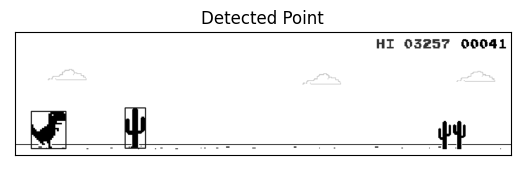

Data del dinosaurio:
{'x': 132, 'y': 113, 'h': 96, 'top_left': (42, 207), 'bottom_right': (132, 303)}

Data del siguiente obstaculo:
{'d': 154, 'y': 122, 'w': 53, 'h': 104, 'top_left': (286, 198), 'bottom_right': (339, 302)}


In [13]:
data = detect_elements(img.copy())
print(f"Data del dinosaurio:\n{data[0]}\n")
print(f"Data del siguiente obstaculo:\n{data[1]}")

Con estos datos ya podemos calcular todo lo que recibe como input nuestro modelo, nos falta unicamente la velocidad y luego normalizar todos los datos.

Para obtener la velocidad del juego podemos usar selenium y correr el siguiente comando

```
# Seteamos la config
options =  webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_experimental_option("useAutomationExtension", False)
options.add_experimental_option("excludeSwitches",["enable-automation"])

s=Service('chromedriver_linux64/chromedriver.exe')
driver = webdriver.Chrome(service=s,options=options)
url='chrome://dino'

# Abrimos el juego de forma automatizada con selenium
driver.get(url)

time.sleep(3)

# Obtenemos la velocidad
speed = driver.execute_script('return Runner.instance_.currentSpeed')
```

## Problemas
Intentando usar el modelo preentrenado con el juego simulado en el juego real aparecieron dos problemas que hacen que el dinosaurio pueda saltar como mucho uno o dos obstaculos.

### Problema 1
 La velocidad en el juego réplica toma distintos valores que en el juego real
 
 Solución: La red ya no recibe la velocidad, es decir, ahora nos queda una red con una capa de 5 inputs
 
 Esto implica que hay que volver a entrenar nuestros modelos pero ahora sin la velocidad. Después de dejar el modelo entrnándose durante una cantidad considerable de generaciones (+300 aprox), vemos que el máximo de las últimas 10 generaciones son:

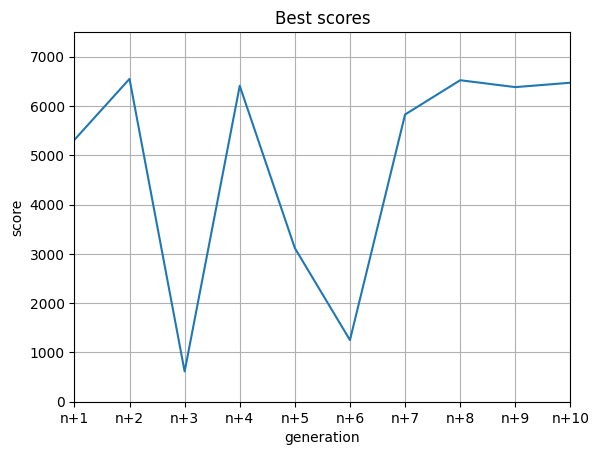

In [14]:
scores3 = pd.read_csv("scores/scores3.csv")
plt.plot(scores3.generation, scores3["1st"])
plt.title("Best scores")
plt.xlabel("generation")
plt.ylabel("score")
plt.xlim([1, 10])
plt.ylim([0,7500])
plt.xticks(scores3.generation, ["n+1","n+2","n+3","n+4","n+5","n+6","n+7","n+8","n+9","n+10"])
plt.grid()
plt.show()

Vemos que se alcanzaron nuevos máximos con respecto al anterior modelo pero también hay caidas notables

### Problema 2
 Resulta que en el juego réplica se toman decisiones constantemente a una velocidad muy rápida dado a que ya contamos con los datos del input. Sin embargo, en el juego real, para obtener estos datos hay que sacar una screenshot y luego detectar sus elementos lo cual lleva cierto tiempo de procesamiento, haciendo que se tomen decisiones con una frecuencia mucho menor, lo que implica que a la hora de decidir evadir un obstaculo generalmente falle porque es probable que al momento de sacar la screenshot el obstaculo se encuentre demasiado cerca.
 
 Solución: Optimizar fuertemente el algoritmo de detección de elementos para que transcurra menos tiempo entre cada iteración de toma de decisión
 
Para ello vamos a recortar la parte del dinosaurio y del puntaje y vamos a detectar todos los contornos de figuras grandes que aparezcan en la imagen, y nos quedaremos con el más próximo, siendo éste el siguiente obstáculo. Este proceso es bastante más simple que el anterior. Para detectar el dinosaurio sí mantedremos el antiguo método

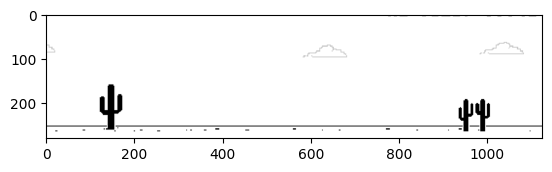

In [15]:
OFFSET_X = 165
OFFSET_Y = 40

plt.imshow(img[OFFSET_Y:,OFFSET_X:],cmap='gray')
plt.show()

In [16]:
def detect_obstacles2(img):    
    # Ponemos en 255 todos los pixeles oscuros y en 0 todo lo que no nos sirve
    cond = img < 100
    img[cond] = 255
    img[~cond] = 0
    
    contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    rects = []
    # Iterar a través de los contornos encontrados
    for contour in contours:
        # Ignorar contornos demasiado pequeños
        if cv2.contourArea(contour) < 100:
            continue
        # Obtener las coordenadas (x, y) y el ancho y alto del rectángulo que encierra el contorno
        (x, y, w, h) = cv2.boundingRect(contour)
        if h < 30:
            continue
        rects.append({'d': OFFSET_X+x, 'y': invert_y_axis(OFFSET_Y+y), 'w': w, 'h': h})
        # Dibujar un rectángulo alrededor del contorno encontrado
        cv2.rectangle(img, (x, y), (x + w, y + h), 255, 2)
        
    plt.imshow(img)
    plt.show()
    
    dist = [rect['d'] for rect in rects]
    return rects[dist.index(min(dist))]

def detect_dino2(img):
    dino_types = ['DinoStart','DinoDuck1']
    
    for dino_type in dino_types:
        template = cv2.imread(f"pics/elements/{dino_type}.png",0)
        w, h = template.shape[::-1]
        method = eval('cv2.TM_CCOEFF_NORMED')
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        if max_val > 0.8:
            top_left = (max_loc[0],max_loc[1])
            bottom_right = (top_left[0] + w, top_left[1] + h)
            
            return {"x":top_left[0]+w,
                "y":invert_y_axis(top_left[1]),
                "h":h,
                "top_left":top_left, 
                "bottom_right":bottom_right}
    return False

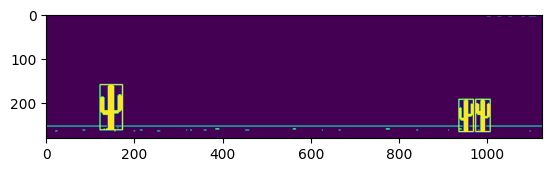

Data del sgte obstaculo: {'d': 287, 'y': 121, 'w': 51, 'h': 102}
Data de dino: {'x': 132, 'y': 113, 'h': 96, 'top_left': (42, 207), 'bottom_right': (132, 303)}


In [17]:
obst_data = detect_obstacles2(img.copy()[OFFSET_Y:,OFFSET_X:])
dino_data = detect_dino2(img.copy()[:,:OFFSET_X])
print(f"Data del sgte obstaculo: {obst_data}")
print(f"Data de dino: {dino_data}")

## Probando modelo entrenado - Resultados
Al aplicar esta mejora vemos que los resultados en el juego real cambian notablemente, sin embargo siguen siendo bastante malos. Si bien antes el dinosaurio no podía esquivar más de dos obstaculos, ahora le cuesta esquivar cuando el juego agarra más velocidad. 

Después de volver a entrenar en el juego réplica sin el parametro de la velocidad durante 100 generaciones y usando ese genoma en el juego real, se obtuvieron los siguientes resultados:

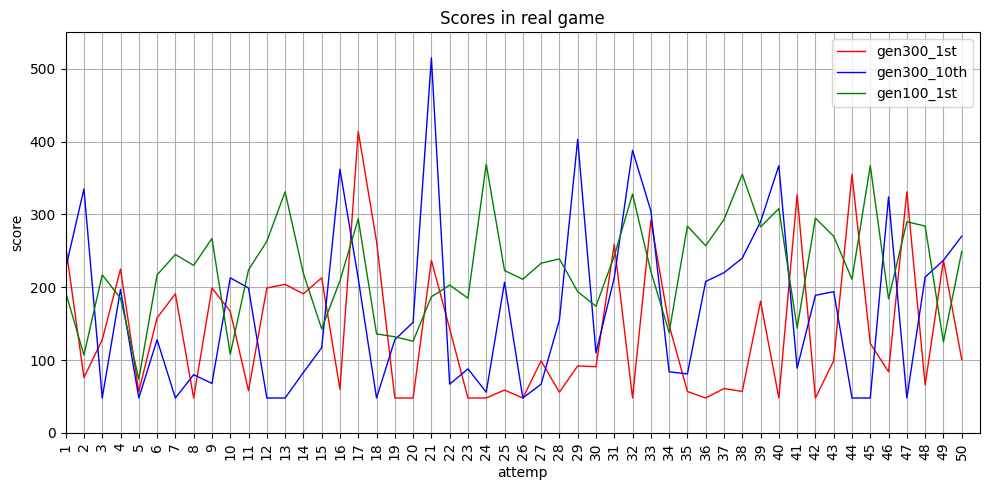

In [18]:
scores_final = pd.read_csv('scores/score_final.csv')

fig = plt.figure(figsize=(10,5))

plt.plot(scores_final.index,scores_final['gen300_1st'],  linestyle="-", color='red', linewidth=1, label="gen300_1st")
plt.plot(scores_final.index,scores_final['gen300_10th'], linestyle="-", color='blue',linewidth=1, label="gen300_10th")
plt.plot(scores_final.index,scores_final['gen100_1st'],  linestyle="-", color='green',linewidth=1,label="gen100_1st")

plt.title("Scores in real game")
plt.xlabel("attemp")
plt.ylabel("score")
plt.ylim([0, 550])
plt.xlim([1, 50])
plt.xticks(scores_final.index,[x+1 for x in scores_final.index.values], rotation=90)
plt.grid()
plt.legend()

fig.tight_layout()
plt.show()

Como podemos ver, la mejora es notable ya que logra esquivar bastantes más de 1 o 2 obstaculos aunque los puntajes obtenidos son considerablemente menores a los que obtiene el mismo genoma en el juego simulado.

Además, a simple vista podemos ver que los puntajes del mejor genoma del modelo entrenado por mas tiempo (linea roja) parece ser el peor de los tres. Por otro lado, el décimo mejor genoma es quien alcanzó los puntajes más altos, pero también vemos que en ciertos intentos tuvo un puntaje bastante bajo similar al de la linea roja, mientras que el mejor genoma de la generación 100 si bien no tiene un máximo tan alto, pareciera que en promedio obtuvo mejor puntaje.

Veamos algunos estadisticos y un histograma de la distribución de puntajes

,max_score,min_score,mean_score,median_score
gen300_1st,414,48,141.90,100.0
gen300_10th,515,48,171.22,153.5
gen100_1st,369,74,225.36,222.5


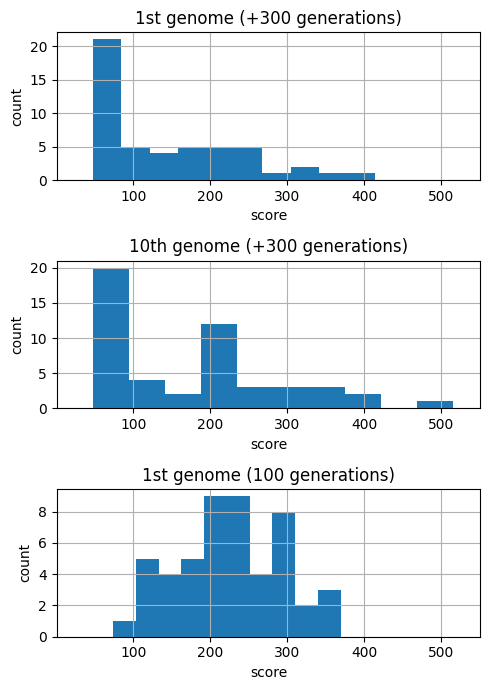

In [19]:
col1 = scores_final.gen300_1st
col2 = scores_final.gen300_10th
col3 = scores_final.gen100_1st

stats = pd.DataFrame(data=[
    {'max_score':col1.max(),'min_score':col1.min(),'mean_score':col1.mean(),'median_score':col1.median()},
    {'max_score':col2.max(),'min_score':col2.min(),'mean_score':col2.mean(),'median_score':col2.median()},
    {'max_score':col3.max(),'min_score':col3.min(),'mean_score':col3.mean(),'median_score':col3.median()},
], index=scores_final.columns)

display(stats)

scores_final = pd.read_csv('scores/score_final.csv')

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(5,7))
plots = [("gen300_1st","1st genome (+300 generations)"), ("gen300_10th","10th genome (+300 generations)"),("gen100_1st","1st genome (100 generations)")]
for i,plot in enumerate(plots):
    ax[i].hist(scores_final[plot[0]],bins=10)
    ax[i].set_title(plot[1])
    ax[i].set_xlabel("score")
    ax[i].set_ylabel("count")
    ax[i].set_xlim([1, 550])
    ax[i].grid()
    
fig.tight_layout()
plt.show()

Efectivamente, los genomas entrenados durante 300 generaciones son los que obtienen el máximo más alto, sin embargo tienen una alta cantidad de puntajes muy bajos (menores a 100). Por otro lado, el genoma entrenado durante 100 generaciones, si bien no alcanza puntajes tan altos, en promedio obtiene puntajes mucho mejores (ver media y mediana de la tabla).

Ante este escenario, es posible que estemos ante un caso de overfitting

### Conclusion

Como conclusión, el rendimiento en el juego real es mucho menor y en parte puede deberse a pequeñas variaciones que pueden llegar a haber entre el juego real y el clon, como por ejemplo la velocidad y frecuencia de los obstaculos, pequeñas variaciones en el tamaño de los elementos del juego, etc. Entonces, para obtener el mejor resultado posible lo ideal seria entrenar este modelo directamente en el juego real, aunque este proceso llevaría demasiado tiempo dado a que podemos jugar con un dinosaurio a la vez.

Por último, también es importante aclarar que probablemente los resultados tampoco sean similares al del juego clonado debido a que entre cada toma de decisiones existe de por medio un proceso que involucra sacar la screenshot y encontrar la posicion del dinosaurio y del proximo obstaculo por lo que inevitablemente vamos a obtener información de forma más lenta y esto es probable que impida seguir esquivando obstaculos cuando el juego alcance una velocidad considerable.